<ipython-input-1-a6e9f2696b7e>:9: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = filters.sobel(gray_image, axis=1)
<ipython-input-1-a6e9f2696b7e>:10: DeprecationWarning: Please use `sobel` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = filters.sobel(gray_image, axis=0)
<ipython-input-1-a6e9f2696b7e>:12: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ixx = filters.gaussian_filter(Ix**2, sigma=1)
<ipython-input-1-a6e9f2696b7e>:13: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iyy = filters.gaussian_filter(Iy**2, sigma=1)
<ipython-input-1-a6e9f2696b7e>:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` nam

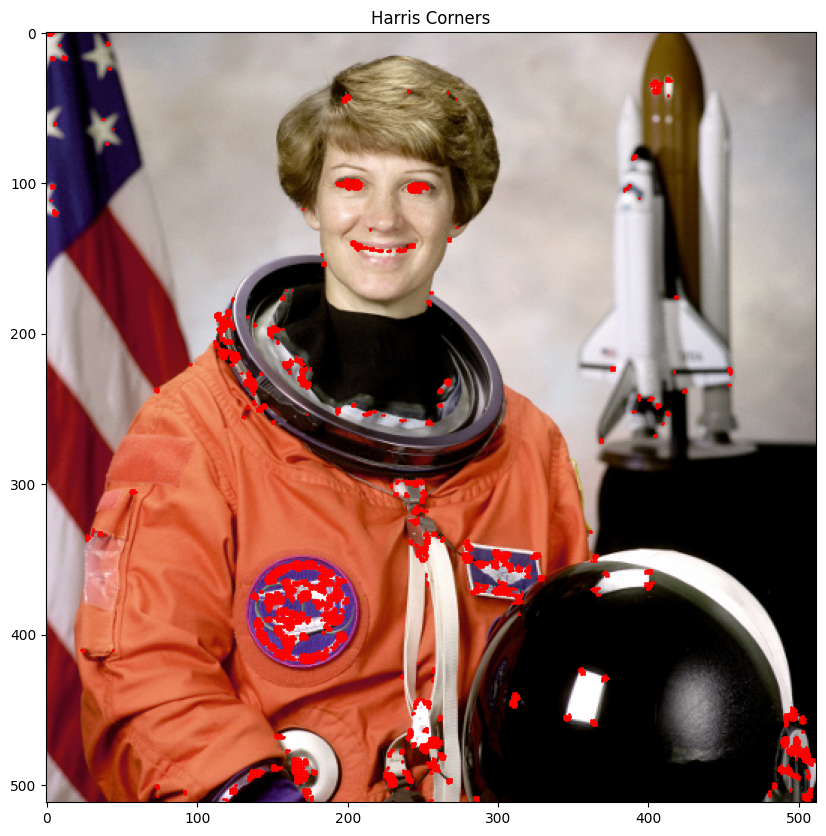

In [ ]:
import numpy as np
from scipy.ndimage import filters
import matplotlib.pyplot as plt
from skimage import io, color, data
def harris_corner_detector(image, k=0.04, threshold=0.01):
 # Convert to grayscale
 gray_image = color.rgb2gray(image)
 # Compute x and y gradients
 Ix = filters.sobel(gray_image, axis=1)
 Iy = filters.sobel(gray_image, axis=0)
 # Compute products of derivatives
 Ixx = filters.gaussian_filter(Ix**2, sigma=1)
 Iyy = filters.gaussian_filter(Iy**2, sigma=1)
 Ixy = filters.gaussian_filter(Ix*Iy, sigma=1)
 # Compute the Harris response
 det_M = Ixx * Iyy - Ixy**2
 trace_M = Ixx + Iyy
 R = det_M - k * (trace_M**2)
 # Threshold on the Harris response
 corners = R > threshold * R.max()
 return corners, R
# Load an example image
image = data.astronaut() # Using the astronaut image from skimage.data
# Detect corners
corners, R = harris_corner_detector(image)
# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.scatter(np.argwhere(corners)[:, 1], np.argwhere(corners)[:, 0], s=1, c='r', marker='o')
plt.title('Harris Corners')
plt.show()